# Author :- Purnesh Mistry

# TASK (2) : Prediction using Unsupervised ML

 From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent it visually.

## K-Means Clustering

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
# Load the IRIS Dataset from sklearn
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the Optimum number of clusters for K-Means and determining the value of K.

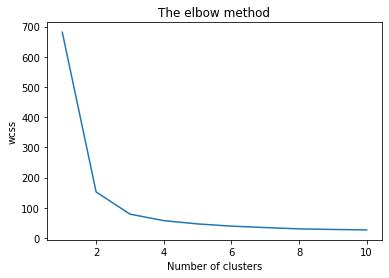

In [11]:
# Finding the optimum number of clusters for k-means classification

X = iris_df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    Kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)
    
# Plotting the results into a line graphh,
# Observe "The Elbow "
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

In [14]:
# Applying kmeans to the dataset / Creating the kmeans classifier

Kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = Kmeans.fit_predict(X)

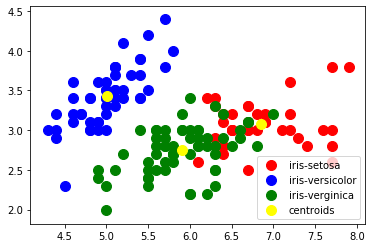

In [17]:
# Visualising the clusters - on the first two columns

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
           s = 100, c = 'red', label = 'iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
           s = 100, c = 'blue', label = 'iris-versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
           s = 100, c = 'green', label = 'iris-verginica')

# Plotting the centroids of the clusters
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1],
           s=100, c = 'yellow', label = 'centroids')
plt.legend()
plt.show()